In [2]:
#Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Section 1 - Reading Data

In [3]:
data_path = '/Users/hp/Desktop/SkillSanta Project/Data'
train_file = 'train.csv'
test_file = 'test.csv'

#Using "os.path.join" because it is platform independent, 
#could have also used "+" sign to concat file names with path
df_train_org = pd.read_csv(os.path.join(data_path, train_file))
df_test = pd.read_csv(os.path.join(data_path, test_file))
df_train = df_train_org.iloc[:,:-1]

# Section 2 - EDA (Exploratory Data Analysis)

In [4]:
#Function to get informations about the DF
def get_df_info(df, include_unique_values = False):
    col_name = list(df.columns)
    col_type = [type(df[col][0]) for col in col_name]
    col_null_count = [df[col].isnull().sum() for col in col_name]
    col_unique_count = [df[col].nunique() for col in col_name]
    col_mem_usage = [df[col].memory_usage(deep = True) for col in col_name]
    df_total_mem = sum(col_mem_usage) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name]
        df_info = pd.DataFrame({'column_name': col_name,
                                'type': col_type,
                                'null_count': col_null_count,
                                'nunique': col_unique_count,
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name,
                                'type': col_type,
                                'null_count': col_null_count,
                                'nunique': col_unique_count})
    return df_info, df_total_mem

In [6]:
df_train_org.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_train_org_info, df_train_org_total_mem = get_df_info(df_train_org, True)
print(df_train_org_total_mem)
df_train_org_info

193.79075241088867


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000001, 1000002, 1000003, 1000004, 1000005, ..."
1,Product_ID,<class 'str'>,0,3631,"[P00069042, P00248942, P00087842, P00085442, P..."
2,Gender,<class 'str'>,0,2,"[F, M]"
3,Age,<class 'str'>,0,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,<class 'numpy.int64'>,0,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,<class 'str'>,0,3,"[A, C, B]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[0, 1]"
8,Product_Category_1,<class 'numpy.int64'>,0,20,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1..."
9,Product_Category_2,<class 'numpy.float64'>,173638,17,"[nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5..."


In [8]:
df_train_org.shape

(550068, 12)

In [9]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [10]:
df_test_info, df_test_total_mem = get_df_info(df_test, True)
print(df_test_total_mem)

80.51622295379639


In [11]:
df_test.shape

(233599, 11)

In [12]:
df_test_info

,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000004, 1000009, 1000010, 1000011, 1000013, ..."
1,Product_ID,<class 'str'>,0,3491,"[P00128942, P00113442, P00288442, P00145342, P..."
2,Gender,<class 'str'>,0,2,"[M, F]"
3,Age,<class 'str'>,0,7,"[46-50, 26-35, 36-45, 18-25, 51-55, 55+, 0-17]"
4,Occupation,<class 'numpy.int64'>,0,21,"[7, 17, 1, 15, 3, 0, 8, 16, 4, 12, 13, 18, 11,..."
5,City_Category,<class 'str'>,0,3,"[B, C, A]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 0, 4+, 1, 3]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[1, 0]"
8,Product_Category_1,<class 'numpy.int64'>,0,18,"[1, 3, 5, 4, 2, 10, 15, 18, 8, 13, 6, 11, 12, ..."
9,Product_Category_2,<class 'numpy.float64'>,72344,17,"[11.0, 5.0, 14.0, 9.0, 3.0, 4.0, 13.0, 2.0, na..."


In [13]:
df_train_org.Purchase.value_counts()

7011     191
7193     188
6855     187
6891     184
6960     183
7012     183
6879     182
7166     182
7027     182
7165     180
6868     180
6883     180
6858     179
7185     178
6923     178
7089     178
6931     178
7093     178
7114     177
7188     177
7060     176
6908     176
7085     176
7167     175
7159     175
6973     175
7146     175
6928     175
6949     175
7192     174
        ... 
14650      1
15063      1
17112      1
11151      1
3365       1
4724       1
14296      1
10499      1
5687       1
14593      1
23855      1
17366      1
23863      1
10355      1
2931       1
6708       1
349        1
3389       1
14896      1
4868       1
14114      1
208        1
14682      1
14138      1
10290      1
15105      1
14384      1
10453      1
8537       1
14640      1
Name: Purchase, Length: 18105, dtype: int64

# Section 3 - Data Wrangling

In [90]:
#Concatinating train_org and test set into one dataset
df_concat_org = pd.concat([df_train_org, df_test], ignore_index = True, join = 'outer', sort = False)
df_concat_org

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [15]:
#Concatinating train and test set into one dataset
df_concat = pd.concat([df_train, df_test], ignore_index = True, join = 'outer', sort = False)
df_concat

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN


In [16]:
df_concat_info, df_concat_total_mem = get_df_info(df_concat, True)
print(df_concat_total_mem)
df_concat_info

270.1093740463257


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000001, 1000002, 1000003, 1000004, 1000005, ..."
1,Product_ID,<class 'str'>,0,3677,"[P00069042, P00248942, P00087842, P00085442, P..."
2,Gender,<class 'str'>,0,2,"[F, M]"
3,Age,<class 'str'>,0,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,<class 'numpy.int64'>,0,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,<class 'str'>,0,3,"[A, C, B]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[0, 1]"
8,Product_Category_1,<class 'numpy.int64'>,0,20,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1..."
9,Product_Category_2,<class 'numpy.float64'>,245982,17,"[nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5..."


In [17]:
df_concat.shape

(783667, 11)

In [18]:
df_concat['Product_Category_2'].mode()

0    8.0
dtype: float64

In [19]:
df_concat['Product_Category_3'].mode()

0    16.0
dtype: float64

# 3.1 Imputing Mode Value at Missing Place


In [20]:
#Creating a copy of df so that changes won't affect in the original one
df_concat_copy = df_concat.copy(deep = True)

In [21]:
df_concat_copy.Product_Category_2.fillna(value = 8, inplace = True)
df_concat_copy.Product_Category_3.fillna(value = 16, inplace = True)

In [22]:
df_concat_copy_info, df_concat_copy_total_mem = get_df_info(df_concat_copy, True)
print(df_concat_copy_total_mem)
df_concat_copy_info

270.1093740463257


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000001, 1000002, 1000003, 1000004, 1000005, ..."
1,Product_ID,<class 'str'>,0,3677,"[P00069042, P00248942, P00087842, P00085442, P..."
2,Gender,<class 'str'>,0,2,"[F, M]"
3,Age,<class 'str'>,0,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,<class 'numpy.int64'>,0,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,<class 'str'>,0,3,"[A, C, B]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[0, 1]"
8,Product_Category_1,<class 'numpy.int64'>,0,20,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1..."
9,Product_Category_2,<class 'numpy.float64'>,0,17,"[8.0, 6.0, 14.0, 2.0, 15.0, 16.0, 11.0, 5.0, 3..."


# 3.2 Convertion to Categorical Data Type

In [23]:
#User_ID
#print(sorted(df_concat_copy['User_ID'].unique()))
print(df_concat_copy['User_ID'].describe())
df_concat_copy.groupby('User_ID')['User_ID'].count()

count    7.836670e+05
mean     1.003029e+06
std      1.727267e+03
min      1.000001e+06
25%      1.001519e+06
50%      1.003075e+06
75%      1.004478e+06
max      1.006040e+06
Name: User_ID, dtype: float64


User_ID
1000001     47
1000002    107
1000003     41
1000004     15
1000005    151
1000006     58
1000007     26
1000008    110
1000009     85
1000010    324
1000011    110
1000012     20
1000013     86
1000014     22
1000015    163
1000016     26
1000017    167
1000018    238
1000019    202
1000020     17
1000021     20
1000022    235
1000023    245
1000024    107
1000025     63
1000026    326
1000027     61
1000028     89
1000029     82
1000030     38
          ... 
1006011    151
1006012     21
1006013    103
1006014     82
1006015     50
1006016    731
1006017     26
1006018    127
1006019     69
1006020     36
1006021    102
1006022     38
1006023    119
1006024     75
1006025    229
1006026     71
1006027     29
1006028     37
1006029     23
1006030     97
1006031     41
1006032     84
1006033     52
1006034     13
1006035    219
1006036    719
1006037    163
1006038     21
1006039    103
1006040    272
Name: User_ID, Length: 5891, dtype: int64

In [24]:
#Product_ID
#print(sorted(df_concat_copy['Product_ID'].unique()))
print(df_concat_copy['Product_ID'].describe())
df_concat_copy.groupby('Product_ID')['Product_ID'].count()

count        783667
unique         3677
top       P00265242
freq           2709
Name: Product_ID, dtype: object


Product_ID
P00000142    1636
P00000242     546
P00000342     349
P00000442     126
P00000542     229
P00000642     725
P00000742     353
P00000842      54
P00000942      78
P00001042     710
P00001142     829
P00001242     129
P00001342      81
P00001442     122
P00001542     102
P00001642     505
P00001742     662
P00001842     119
P00001942     306
P00002042     134
P00002142    1046
P00002242     286
P00002342      96
P00002442     481
P00002542     782
P00002642      82
P00002742      46
P00002842     137
P00002942     309
P00003042      55
             ... 
P0097042      130
P0097142      705
P0097242     1304
P0097342      488
P0097442        9
P0097542        3
P0097642        2
P0097742      372
P0097842      414
P0097942       79
P0098042       27
P0098142       72
P0098242      328
P0098342      358
P0098442      110
P0098542       78
P0098642       33
P0098742       64
P0098842       13
P0098942       43
P0099042      215
P0099142        9
P0099242      365
P0099342      610

In [25]:
#Gender
print(sorted(df_concat_copy['Gender'].unique()))
print(df_concat_copy['Gender'].describe())
df_concat_copy.groupby('Gender')['Gender'].count()

['F', 'M']
count     783667
unique         2
top            M
freq      590031
Name: Gender, dtype: object


Gender
F    193636
M    590031
Name: Gender, dtype: int64

In [26]:
#Age
print(sorted(df_concat_copy['Age'].unique()))
print(df_concat_copy['Age'].describe())
df_concat_copy.groupby('Age')['Age'].count()

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
count     783667
unique         7
top        26-35
freq      313015
Name: Age, dtype: object


Age
0-17      21334
18-25    141953
26-35    313015
36-45    156724
46-50     65278
51-55     54784
55+       30579
Name: Age, dtype: int64

In [27]:
#Occupation
print(sorted(df_concat_copy['Occupation'].unique()))
print(df_concat_copy['Occupation'].describe())
df_concat_copy.groupby('Occupation')['Occupation'].count()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
count    783667.000000
mean          8.079300
std           6.522206
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64


Occupation
0      98850
1      67687
2      37996
3      25126
4     103086
5      17373
6      29102
7      84127
8       2189
9       8929
10     18304
11     16593
12     44448
13     11053
14     38782
15     17356
16     36122
17     57418
18      9367
19     11919
20     47840
Name: Occupation, dtype: int64

In [28]:
#City_Category
print(sorted(df_concat_copy['City_Category'].unique()))
print(df_concat_copy['City_Category'].describe())
df_concat_copy.groupby('City_Category')['City_Category'].count()

['A', 'B', 'C']
count     783667
unique         3
top            B
freq      329739
Name: City_Category, dtype: object


City_Category
A    210244
B    329739
C    243684
Name: City_Category, dtype: int64

In [29]:
#Stay_In_Current_City_Years
print(sorted(df_concat_copy['Stay_In_Current_City_Years'].unique()))
print(df_concat_copy['Stay_In_Current_City_Years'].describe())
df_concat_copy.groupby('Stay_In_Current_City_Years')['Stay_In_Current_City_Years'].count()

['0', '1', '2', '3', '4+']
count     783667
unique         5
top            1
freq      276425
Name: Stay_In_Current_City_Years, dtype: object


Stay_In_Current_City_Years
0     105716
1     276425
2     145427
3     135428
4+    120671
Name: Stay_In_Current_City_Years, dtype: int64

In [30]:
#Marital_Status
print(sorted(df_concat_copy['Marital_Status'].unique()))
print(df_concat_copy['Marital_Status'].describe())
df_concat_copy.groupby('Marital_Status')['Marital_Status'].count()

[0, 1]
count    783667.000000
mean          0.409777
std           0.491793
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64


Marital_Status
0    462538
1    321129
Name: Marital_Status, dtype: int64

In [31]:
#Product_Category_1
print(sorted(df_concat_copy['Product_Category_1'].unique()))
print(df_concat_copy['Product_Category_1'].describe())
df_concat_copy.groupby('Product_Category_1')['Product_Category_1'].count()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64


Product_Category_1
1     200699
2      34056
3      28791
4      16756
5     215950
6      29326
7       5345
8     162294
9        604
10      7373
11     34440
12      5610
13      7930
14      2186
15      8984
16     13933
17       801
18      4436
19      1603
20      2550
Name: Product_Category_1, dtype: int64

In [32]:
#Product_Category_2
print(sorted(df_concat_copy['Product_Category_2'].unique()))
print(df_concat_copy['Product_Category_2'].describe())
df_concat_copy.groupby('Product_Category_2')['Product_Category_2'].count()

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
count    783667.000000
mean          9.265541
std           4.301427
min           2.000000
25%           8.000000
50%           8.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64


Product_Category_2
2.0      70498
3.0       4123
4.0      36705
5.0      37165
6.0      23575
7.0        854
8.0     337299
9.0       8177
10.0      4420
11.0     20230
12.0      7801
13.0     15054
14.0     78834
15.0     54114
16.0     61687
17.0     19104
18.0      4027
Name: Product_Category_2, dtype: int64

In [33]:
#Product_Category_3
print(sorted(df_concat_copy['Product_Category_3'].unique()))
print(df_concat_copy['Product_Category_3'].describe())
df_concat_copy.groupby('Product_Category_3')['Product_Category_3'].count()

[3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
count    783667.000000
mean         14.988858
std           2.740792
min           3.000000
25%          16.000000
50%          16.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64


Product_Category_3
3.0        878
4.0       2691
5.0      23799
6.0       6888
8.0      17861
9.0      16532
10.0      2501
11.0      2585
12.0     13115
13.0      7849
14.0     26283
15.0     39968
16.0    592278
17.0     23818
18.0      6621
Name: Product_Category_3, dtype: int64

In [34]:
df_concat_copy_info, df_concat_copy_total_mem = get_df_info(df_concat_copy, True)
print(df_concat_copy_total_mem)
df_concat_copy_info

270.1093740463257


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000001, 1000002, 1000003, 1000004, 1000005, ..."
1,Product_ID,<class 'str'>,0,3677,"[P00069042, P00248942, P00087842, P00085442, P..."
2,Gender,<class 'str'>,0,2,"[F, M]"
3,Age,<class 'str'>,0,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,<class 'numpy.int64'>,0,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,<class 'str'>,0,3,"[A, C, B]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[0, 1]"
8,Product_Category_1,<class 'numpy.int64'>,0,20,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1..."
9,Product_Category_2,<class 'numpy.float64'>,0,17,"[8.0, 6.0, 14.0, 2.0, 15.0, 16.0, 11.0, 5.0, 3..."


In [35]:
from sklearn.preprocessing import LabelEncoder
for col in df_concat_copy_info['column_name']:
    col_encoder = LabelEncoder()
    df_concat_copy[col] = col_encoder.fit_transform(df_concat_copy[col])

In [36]:
df_concat_copy_info, df_concat_copy_total_mem = get_df_info(df_concat_copy, True)
print(df_concat_copy_total_mem)
df_concat_copy_info

50.821529388427734


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Product_ID,<class 'numpy.int32'>,0,3677,"[684, 2406, 868, 844, 2769, 1857, 1771, 3364, ..."
2,Gender,<class 'numpy.int32'>,0,2,"[0, 1]"
3,Age,<class 'numpy.int32'>,0,7,"[0, 6, 2, 4, 5, 3, 1]"
4,Occupation,<class 'numpy.int64'>,0,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,<class 'numpy.int32'>,0,3,"[0, 2, 1]"
6,Stay_In_Current_City_Years,<class 'numpy.int32'>,0,5,"[2, 4, 3, 1, 0]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[0, 1]"
8,Product_Category_1,<class 'numpy.int64'>,0,20,"[2, 0, 11, 7, 4, 3, 1, 5, 13, 10, 12, 14, 6, 1..."
9,Product_Category_2,<class 'numpy.int64'>,0,17,"[6, 4, 12, 0, 13, 14, 9, 3, 1, 2, 10, 7, 8, 15..."


In [37]:
df_concat_copy.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,684,0,0,10,0,2,0,2,6,12
1,0,2406,0,0,10,0,2,0,0,4,10
2,0,868,0,0,10,0,2,0,11,6,12
3,0,844,0,0,10,0,2,0,11,12,12
4,1,2769,1,6,16,2,4,0,7,6,12


# Section 4 - Graphs and Visualization

In [38]:
#Will use df_concat_org dataframe for visualisation

#"This function takes the an axes list, the number of plots and sets  the axes list with correct length"
def trim_axs(axs, N):
    axs = axs.flatten()
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def individual_bar_plots(dataframe, item, title, ax = None):
    obj = dataframe.loc[item,:]  # Select item
    obj.plot( kind = 'barh', edgecolor = 'black',  ax = ax, legend = None).set_title(f'{title} {item}')
    ax.set_xlabel('Purchase Mean')

# 4.1 -  Number of purchases of each product category by Age

Text(0.5, 1.0, 'Purchases of Each Product Category by Age')

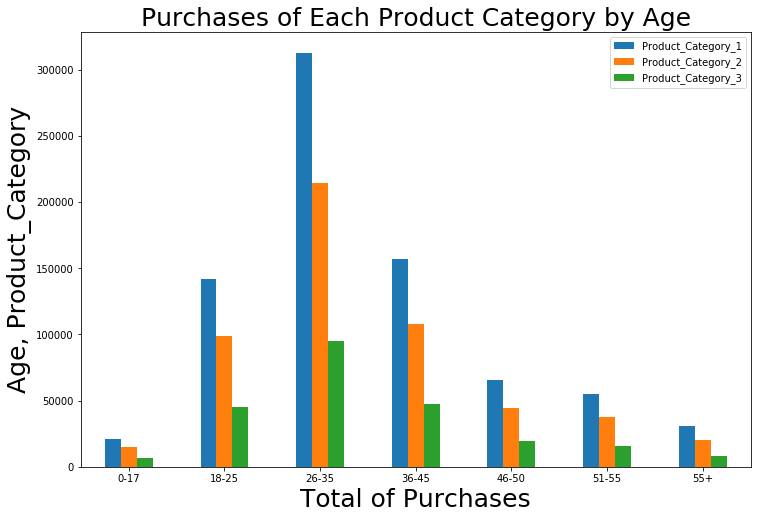

In [66]:
Age_df = df_concat_org.loc[:,[ 'Age','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
Age_df_Pivt = Age_df.pivot_table(Age_df, index = ['Age'], aggfunc = 'count')
Age_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 25)
plt.ylabel('Age, Product_Category', fontsize = 25)
plt.title('Purchases of Each Product Category by Age', fontsize = 25)

# 4.2 - Number of purchases of each product category by Gender

Text(0.5, 1.0, 'Purchases of Each Product Category by Gender')

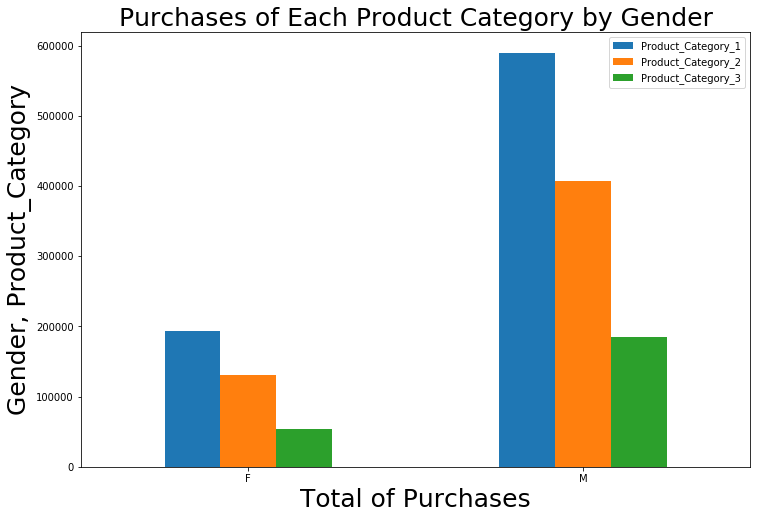

In [40]:
Gender_df = df_concat_org.loc[:,[ 'Gender','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
Gender_df_Pivt = Gender_df.pivot_table(Gender_df, index = ['Gender'], aggfunc = 'count')
Gender_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 25)
plt.ylabel('Gender, Product_Category', fontsize = 25)
plt.title('Purchases of Each Product Category by Gender', fontsize = 25)

# 4.3 - Number of purchases of each product category by Occupation

Text(0.5, 1.0, 'Purchases of Each Product Category by Occupation')

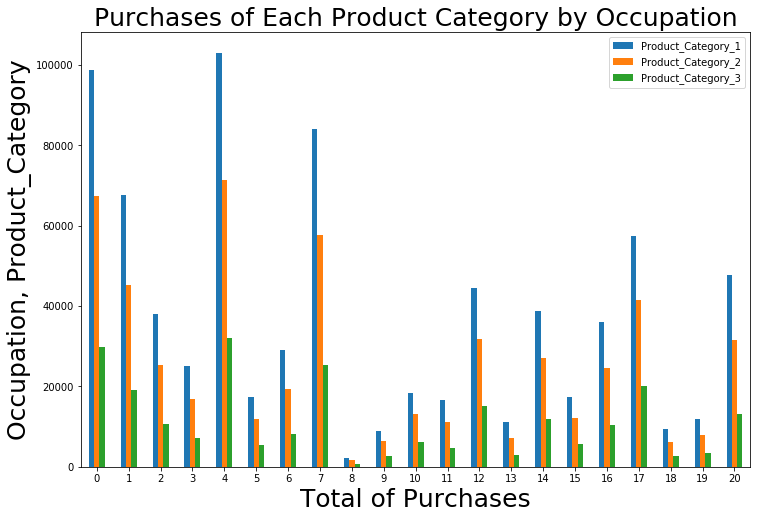

In [41]:
Occupation_df = df_concat_org.loc[:,[ 'Occupation','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
Occupation_df_Pivt = Occupation_df.pivot_table(Occupation_df, index = ['Occupation'], aggfunc = 'count')
Occupation_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 25)
plt.ylabel('Occupation, Product_Category', fontsize = 25)
plt.title('Purchases of Each Product Category by Occupation', fontsize = 25)

# 4.4 - Number of purchases of each product category by City_Category

Text(0.5, 1.0, 'Purchases of Each Product Category by City_Category')

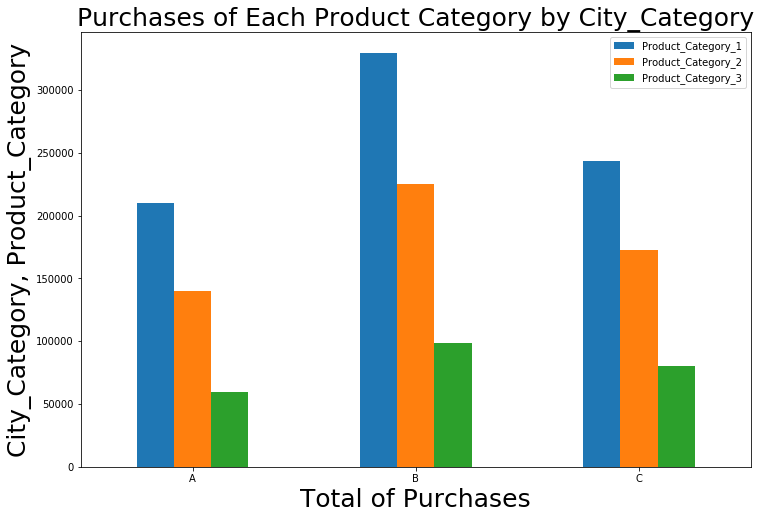

In [42]:
City_Category_df = df_concat_org.loc[:,[ 'City_Category','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
City_Category_df_Pivt = City_Category_df.pivot_table(City_Category_df, index = ['City_Category'], aggfunc = 'count')
City_Category_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 25)
plt.ylabel('City_Category, Product_Category', fontsize = 25)
plt.title('Purchases of Each Product Category by City_Category', fontsize = 25)

# 4.4.1 - Purchase Mean of Product_Category_1 by City 

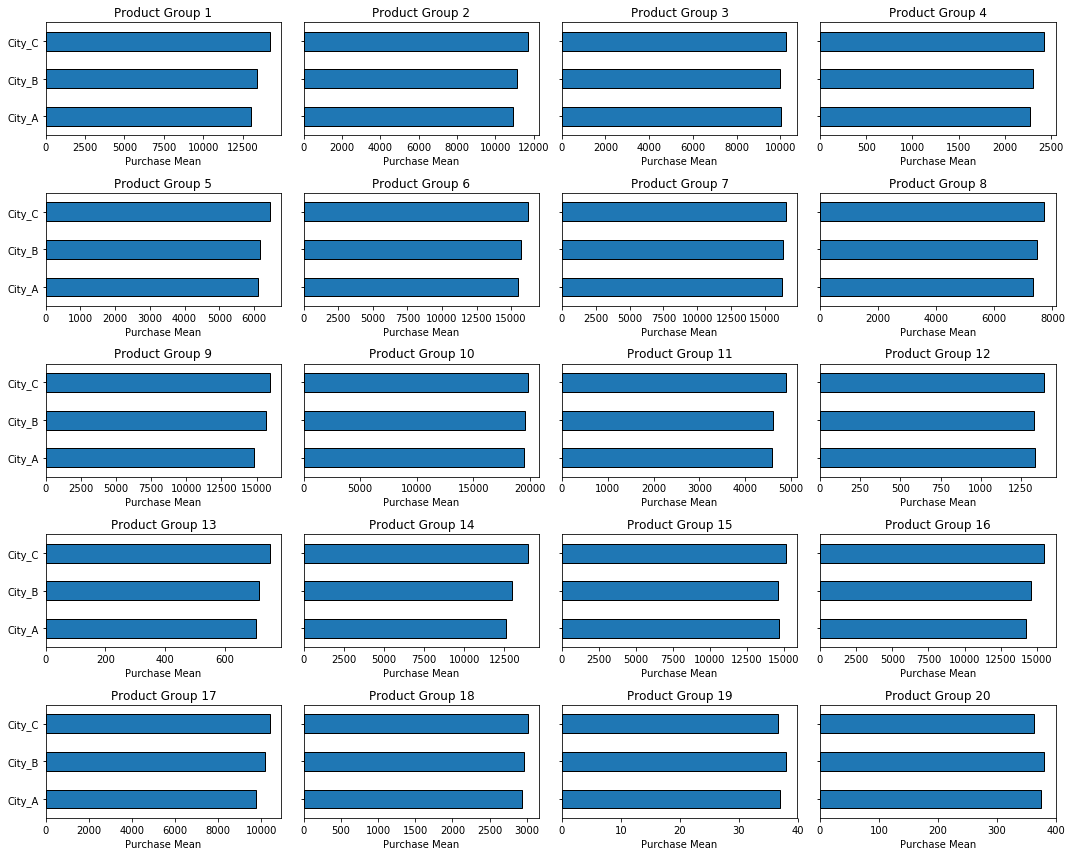

In [43]:
df_city_A = df_concat_org.loc[df_concat_org.City_Category == 'A', :]
df_city_B = df_concat_org.loc[df_concat_org.City_Category == 'B', :]
df_city_C = df_concat_org.loc[df_concat_org.City_Category == 'C', :]

City_A_1 = df_city_A.groupby('Product_Category_1').mean()['Purchase']
City_B_1 = df_city_B.groupby('Product_Category_1').mean()['Purchase']
City_C_1 = df_city_C.groupby('Product_Category_1').mean()['Purchase']

Category_1_df = pd.concat([City_A_1, City_B_1, City_C_1], axis = 1)

Category_1_df.columns = ['City_A', 'City_B', 'City_C']

fig, ax = plt.subplots(nrows = 5 , ncols = 4, figsize = (15,12), sharey = True)

product_category_1_list = sorted(list(df_concat_org.Product_Category_1.unique()))

for subplot, product in zip(ax.flatten(), product_category_1_list):
    individual_bar_plots(Category_1_df, product, ax = subplot, title = 'Product Group')
    
plt.tight_layout()


# 4.4.2 - Purchase Mean of Product_Category_2 by City 

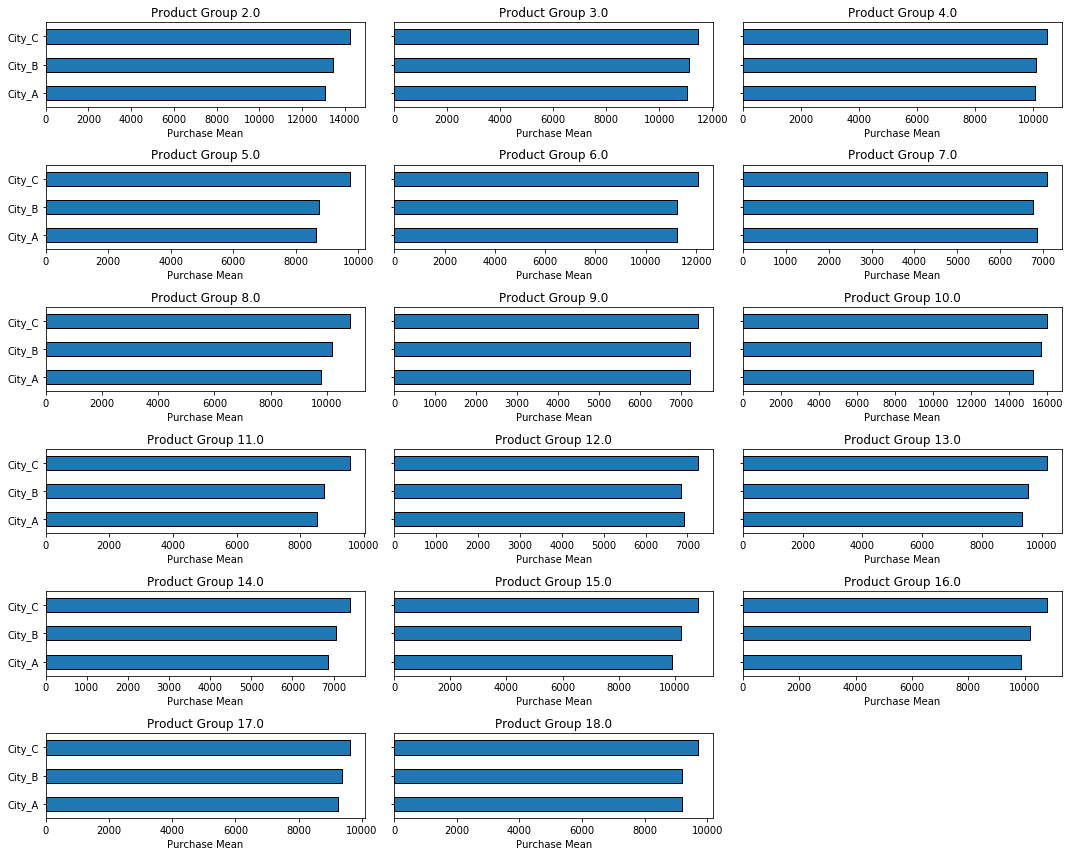

In [44]:
City_A_2 = df_city_A.groupby('Product_Category_2').mean()['Purchase']
City_B_2 = df_city_B.groupby('Product_Category_2').mean()['Purchase']
City_C_2 = df_city_C.groupby('Product_Category_2').mean()['Purchase']

Category_2_df = pd.concat([City_A_2, City_B_2, City_C_2], axis = 1)
Category_2_df.columns = ['City_A', 'City_B', 'City_C']

fig, ax = plt.subplots(nrows = 6 , ncols = 3 , sharey = True, figsize = (15,12))

ax = trim_axs(ax, len(df_concat_org.Product_Category_2.unique()[1:]))

product_category_2_list = sorted(list(df_concat_org.Product_Category_2.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_2_list):
    individual_bar_plots(Category_2_df, product, ax = subplot, title = 'Product Group')

plt.tight_layout()

# 4.4.3 - Purchase Mean of Product_Category_3 by City 

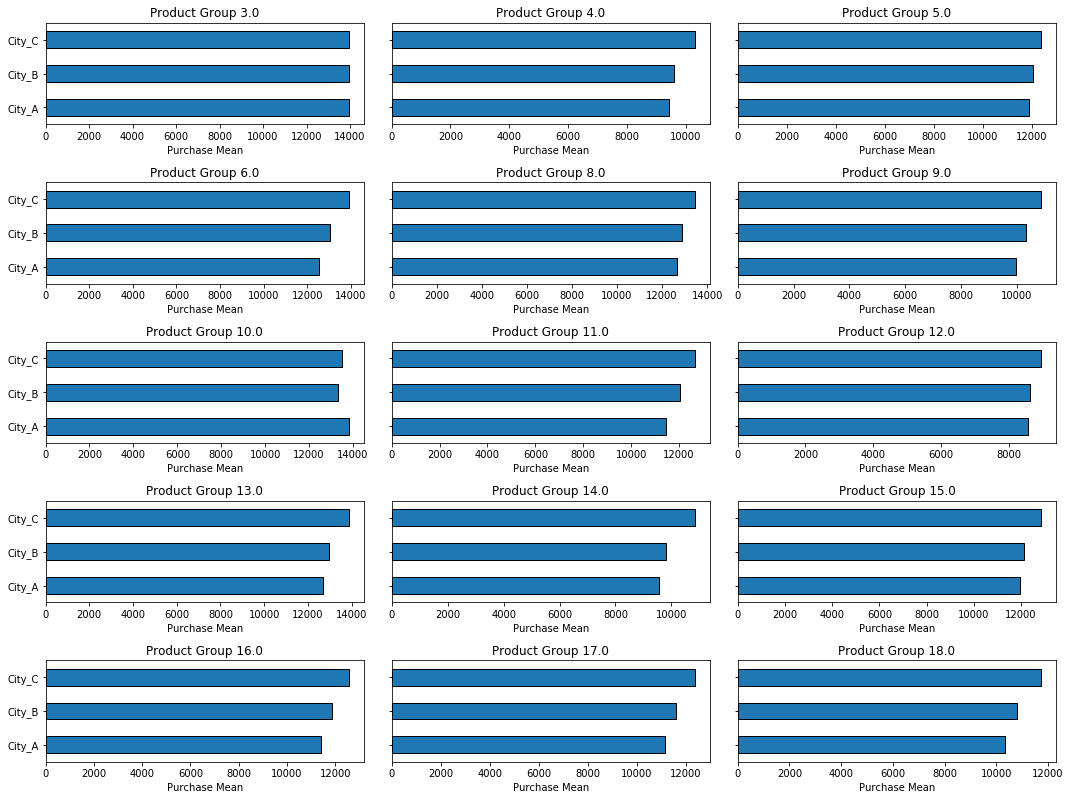

In [45]:
City_A_3 = df_city_A.groupby('Product_Category_3').mean()['Purchase']
City_B_3 = df_city_B.groupby('Product_Category_3').mean()['Purchase']
City_C_3 = df_city_C.groupby('Product_Category_3').mean()['Purchase']

Category_3_df = pd.concat([City_A_3, City_B_3, City_C_3], axis = 1)
Category_3_df.columns = ['City_A', 'City_B', 'City_C']

fig, ax = plt.subplots(nrows = 6 , ncols = 3 , sharey = True, figsize = (15,13))

ax = trim_axs(ax, len(df_concat_org.Product_Category_3.unique()[1:]))

product_category_3_list = sorted(list(df_concat_org.Product_Category_3.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_3_list):
    individual_bar_plots(Category_3_df, product, ax = subplot, title = 'Product Group')

plt.tight_layout()

# 4.5 - Number of purchases of each product category by Stay_In_Current_City_Years

Text(0.5, 1.0, 'Purchases of Each Product Category by Stay_In_Current_City_Years')

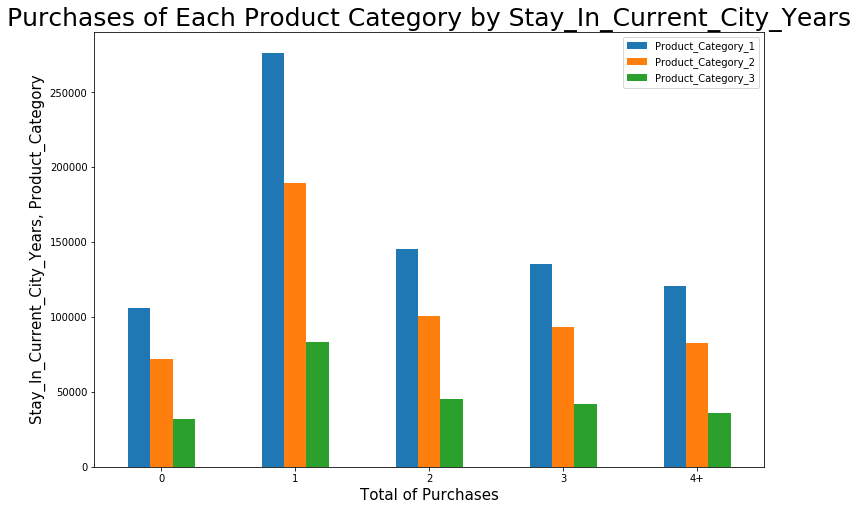

In [46]:
Stay_In_Current_City_Years_df = df_concat_org.loc[:,[ 'Stay_In_Current_City_Years','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
Stay_In_Current_City_Years_df_Pivt = Stay_In_Current_City_Years_df.pivot_table(Stay_In_Current_City_Years_df, index = ['Stay_In_Current_City_Years'], aggfunc = 'count')
Stay_In_Current_City_Years_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 15)
plt.ylabel('Stay_In_Current_City_Years, Product_Category', fontsize = 15)
plt.title('Purchases of Each Product Category by Stay_In_Current_City_Years', fontsize = 25)

# 4.6 - Number of purchases of each product category by Marital_Status

Text(0.5, 1.0, 'Purchases of Each Product Category by Marital_Status')

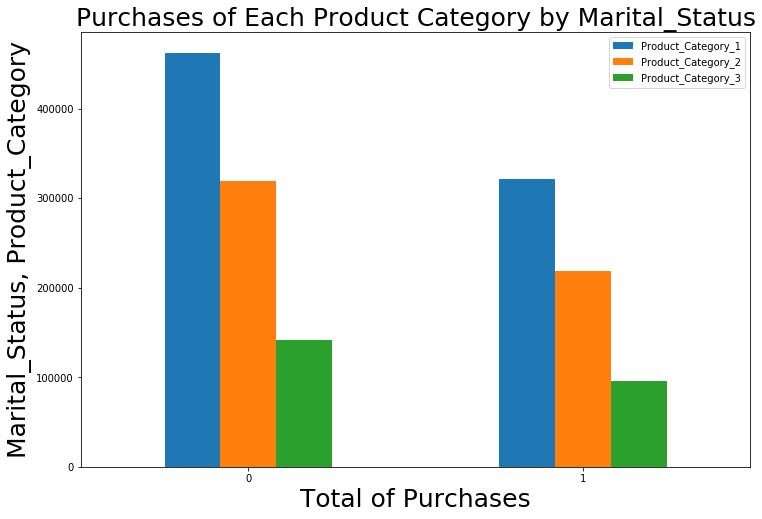

In [47]:
Marital_Status_df = df_concat_org.loc[:,[ 'Marital_Status','Product_Category_1', 'Product_Category_2','Product_Category_3']] 
Marital_Status_df_Pivt = Marital_Status_df.pivot_table(Marital_Status_df, index = ['Marital_Status'], aggfunc = 'count')
Marital_Status_df_Pivt.plot( kind = 'bar',figsize =(12,8))

plt.xticks(rotation = 0, horizontalalignment = "center")
plt.xlabel('Total of Purchases', fontsize = 25)
plt.ylabel('Marital_Status, Product_Category', fontsize = 25)
plt.title('Purchases of Each Product Category by Marital_Status', fontsize = 25)

# 4.7 - Age and City_Category vs Purchase

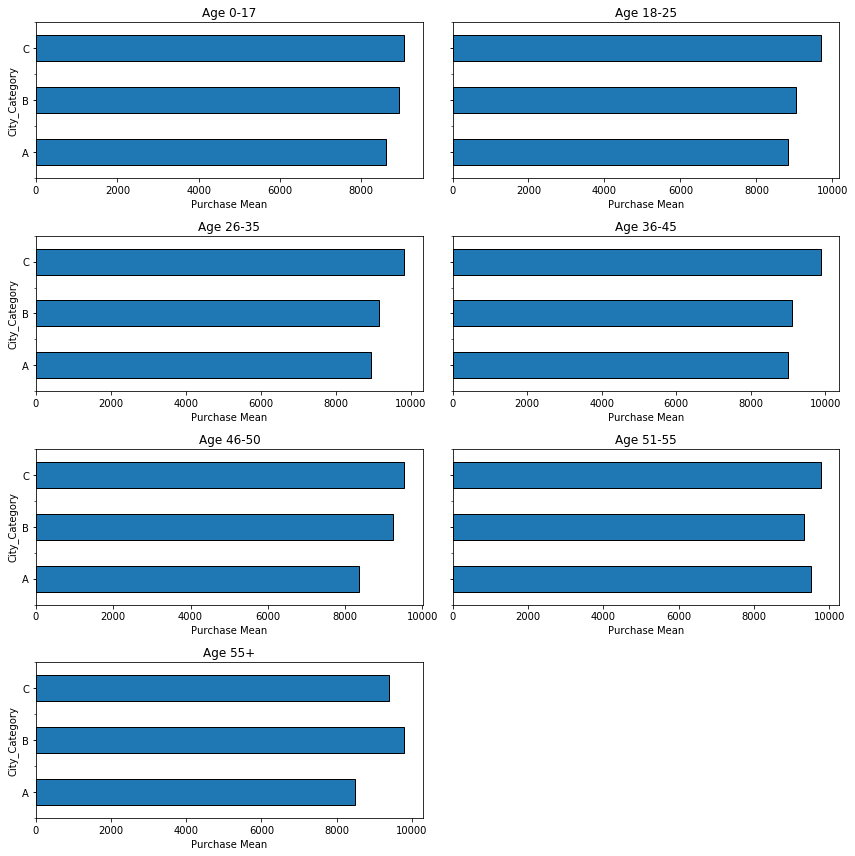

In [48]:
age_group_city = df_concat_org.loc[:, ['Age', 'City_Category', 'Purchase']] 

age_group_city = age_group_city.pivot_table(age_group_city, index = ['Age', 'City_Category'], aggfunc = 'mean')

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 12), sharey = True)

ax = trim_axs(ax, len(df_concat.Age.unique()))

# Age Groups list
age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

# ax.flatten() collapses the ax into one dimension array
for subplot, Age in zip(ax.flatten(), age_list):
    individual_bar_plots(age_group_city, Age, ax = subplot, title = 'Age')
    
plt.tight_layout()


# 4.8 - Age and Gender vs Purchase

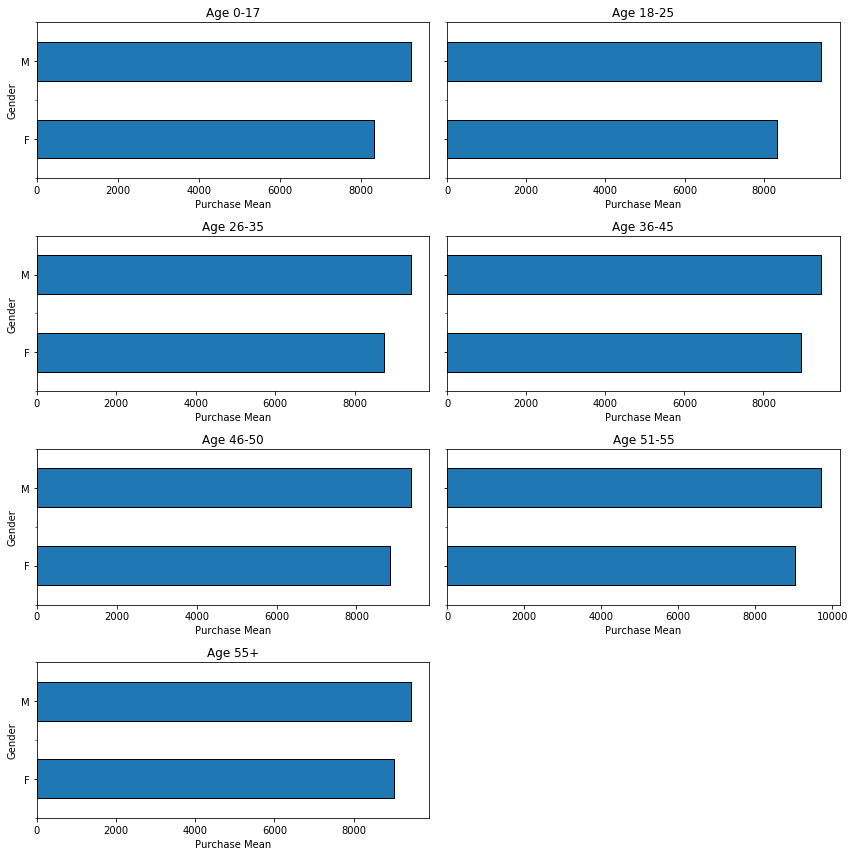

In [49]:
age_group_gender = df_concat_org.loc[:, ['Age', 'Gender', 'Purchase']] 

age_group_gender = age_group_gender.pivot_table(age_group_gender, index = ['Age', 'Gender'], aggfunc = 'mean')

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 12), sharey = True)

ax = trim_axs(ax, len(df_concat.Age.unique()))

# Age Groups list
age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

# ax.flatten() collapses the ax into one dimension array
for subplot, Age in zip(ax.flatten(), age_list):
    individual_bar_plots(age_group_gender, Age, ax = subplot, title = 'Age')
    
plt.tight_layout()


# 4.9 - City_Category and Gender vs Purchase

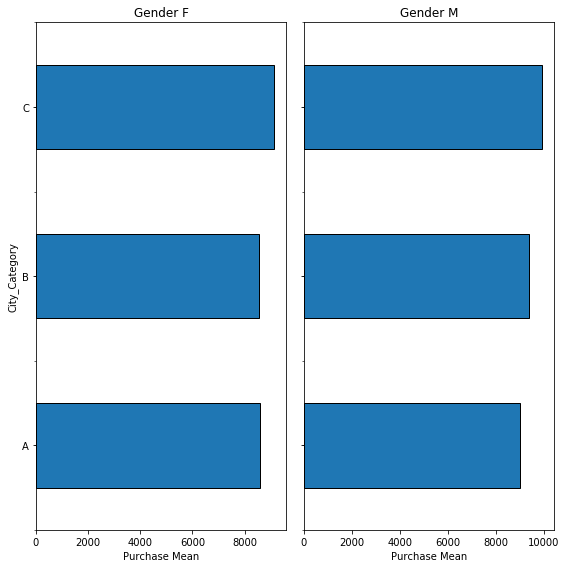

In [50]:
City_Category_group_gender = df_concat_org.loc[:,['Gender', 'City_Category', 'Purchase']] 

City_Category_group_gender = City_Category_group_gender.pivot_table(City_Category_group_gender, index = ['Gender', 'City_Category'], aggfunc = 'mean')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 8), sharey = True)

ax = trim_axs(ax, len(df_concat.Gender.unique()))

# Gender Groups list
Gender_list = ['F', 'M']

# ax.flatten() collapses the ax into one dimension array
for subplot, Gender in zip(ax.flatten(), Gender_list):
    individual_bar_plots(City_Category_group_gender, Gender, ax = subplot, title = 'Gender')
    
plt.tight_layout()


# 4.10 - City_Category and Occupation vs Purchase

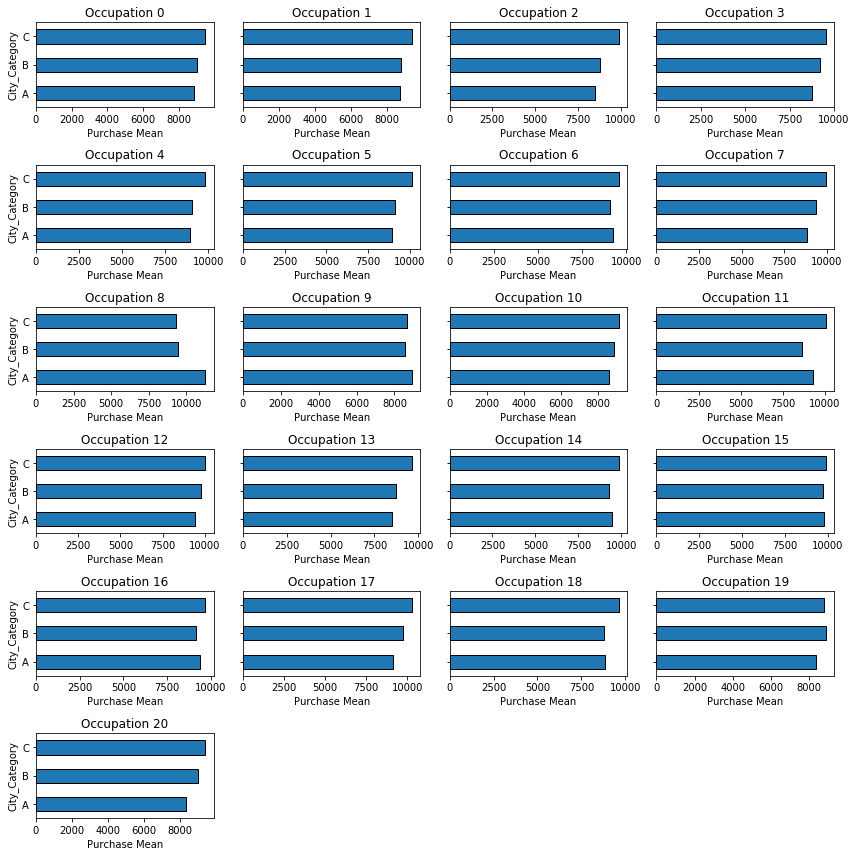

In [98]:
City_Category_group_Occupation = df_concat_org.loc[:,['Occupation', 'City_Category', 'Purchase']] 

City_Category_group_Occupation = City_Category_group_Occupation.pivot_table(City_Category_group_Occupation, index = ['Occupation', 'City_Category'], aggfunc = 'mean')

fig, ax = plt.subplots(nrows = 6, ncols = 4, figsize = (12, 12), sharey = True)

ax = trim_axs(ax, len(df_concat.Occupation.unique()))

# Occupation Groups list
Occupation_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# ax.flatten() collapses the ax into one dimension array
for subplot, Occupation in zip(ax.flatten(), Occupation_list):
    individual_bar_plots(City_Category_group_Occupation, Occupation, ax = subplot, title = 'Occupation')
    
plt.tight_layout()


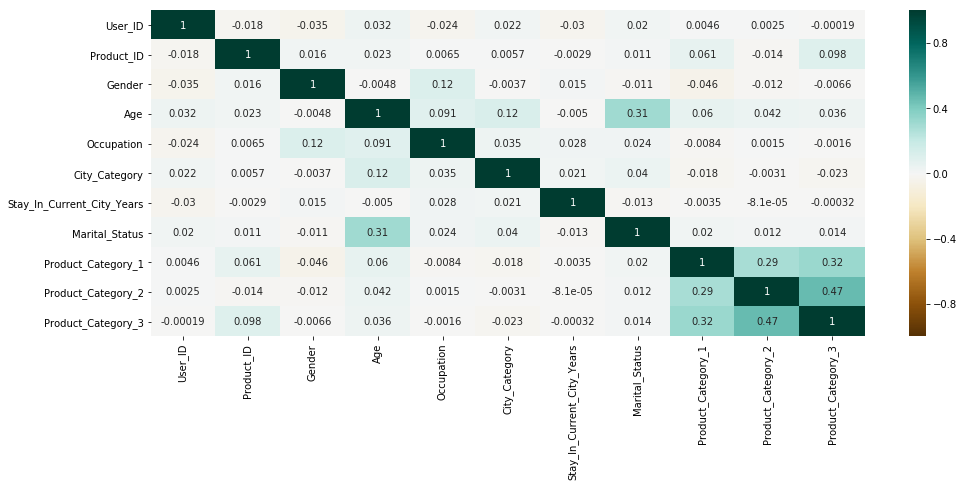

In [51]:
plt.figure(figsize=(16, 6))
sb.heatmap(df_concat_copy.corr(), cmap = 'BrBG', vmin = -1, vmax = 1, annot = True)

# Section 5 - Modeling

In [52]:
X = df_concat_copy.iloc[:550068,:]
y = df_train_org.iloc[:550068,-1:]

In [53]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,684,0,0,10,0,2,0,2,6,12
1,0,2406,0,0,10,0,2,0,0,4,10
2,0,868,0,0,10,0,2,0,11,6,12
3,0,844,0,0,10,0,2,0,11,12,12
4,1,2769,1,6,16,2,4,0,7,6,12


In [54]:
y.head()

,Purchase
0,8370
1,15200
2,1422
3,1057
4,7969


In [55]:
X.shape, y.shape

((550068, 11), (550068, 1))

In [56]:
y = y.to_numpy().ravel()
type(y)

numpy.ndarray

In [57]:
def show_model_eval_table(model_attrib):
    df_model_eval = pd.DataFrame({
        'Names' : model_attrib['Names'],
        'Feature_Counts' : model_attrib['Feature_Counts'],
        'Feature_Names' : model_attrib['Feature_Names'],
        'R2' : model_attrib['R2'],
        'RMSE' : model_attrib['RMSE']
    })
    return df_model_eval.round(2)

In [58]:
model_attrib = {'Names' : [],
        'Feature_Counts' : [],
        'Feature_Names' : [],
        'R2' : [],
        'RMSE' : []
}

In [59]:
import sklearn
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import r2_score, mean_squared_error

In [60]:
cv_score = ['r2', 'neg_mean_squared_error']

 # 5.1 - RFR 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [62]:
rfr = RFR(random_state = 0)
rfr.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [63]:
param_grid = { 
    'n_estimators': [20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf' : [70, 80],
    'max_depth' : [ 7, 8]
}

In [64]:
CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 4)
CV_rfr.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [70, 80], 'max_depth': [7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
CV_rfr.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 70,
 'n_estimators': 20}

In [68]:
RFR_model_1 = cross_validate(RFR(random_state = 0, min_samples_split = 8, min_samples_leaf = 80, n_estimators = 30),
                             X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('RFR_model_1')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(RFR_model_1['test_r2'].mean())
model_attrib['RMSE'].append((abs(RFR_model_1['test_neg_mean_squared_error']) ** 0.5).mean())

RFR_model_2 = cross_validate(RFR(random_state = 0, min_samples_split = 8, max_depth = 8, max_features = 'auto', min_samples_leaf = 70, n_estimators = 20),
                             X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('RFR_model_2')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(RFR_model_2['test_r2'].mean())
model_attrib['RMSE'].append((abs(RFR_model_2['test_neg_mean_squared_error']) ** 0.5).mean())

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.4min remaining:  3.6min
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:  2.4min remaining:  1.6min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   55.4s remaining:  1.4min
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:   55.4s remaining:   36.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   55.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   55.5s finished


In [69]:
show_model_eval_table(model_attrib)

,Names,Feature_Counts,Feature_Names,R2,RMSE
0,RFR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.71,2703.97
1,RFR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.67,2883.50


# 5.2 -  LR

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [71]:
lr = LR()
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [72]:
params_lr = {
    'copy_X': [True, False], 
    'fit_intercept': [True, False], 
    'normalize': [True, False]
}

In [73]:
CV_lr = GridSearchCV(estimator = lr, param_grid = params_lr, cv = 3)
CV_lr.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
CV_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [75]:
LR_model_1 = cross_validate(LR(), X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('LR_model_1')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(LR_model_1['test_r2'].mean())
model_attrib['RMSE'].append((abs(LR_model_1['test_neg_mean_squared_error']) ** 0.5).mean())

LR_model_2 = cross_validate(LR(copy_X = True, fit_intercept = True, normalize = False), X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('LR_model_2')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(LR_model_2['test_r2'].mean())
model_attrib['RMSE'].append((abs(LR_model_2['test_neg_mean_squared_error']) ** 0.5).mean())

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.0s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    4.7s remaining:    3.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.6s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    1.7s finished


In [76]:
show_model_eval_table(model_attrib)

,Names,Feature_Counts,Feature_Names,R2,RMSE
0,RFR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.71,2703.97
1,RFR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.67,2883.50
2,LR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.13,4667.42
3,LR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.13,4667.42


# 5.3 - DTR

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [78]:
dtr = DTR()
dtr.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [79]:
param_grid = { 
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf' : [70, 80],
    'max_depth' : [ 7, 8]
}

In [80]:
CV_dtr = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 4)
CV_dtr.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [70, 80], 'max_depth': [7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
CV_dtr.best_params_

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 80}

In [82]:
DTR_model_1 = cross_validate(DTR(random_state = 0), X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('DTR_model_1')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(DTR_model_1['test_r2'].mean())
model_attrib['RMSE'].append((abs(DTR_model_1['test_neg_mean_squared_error']) ** 0.5).mean())

DTR_model_2 = cross_validate(DTR(random_state = 0, max_depth = 8, max_features = 'auto', min_samples_leaf = 80), 
                             X, y, cv = 5, n_jobs = 5, verbose = 10, scoring = cv_score)
model_attrib['Names'].append('DTR_model_2')
model_attrib['Feature_Counts'].append(X.shape[1])
model_attrib['Feature_Names'].append(list(X.columns))
model_attrib['R2'].append(DTR_model_2['test_r2'].mean())
model_attrib['RMSE'].append((abs(DTR_model_2['test_neg_mean_squared_error']) ** 0.5).mean())

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   13.6s remaining:   20.4s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:   13.7s remaining:    9.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   14.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   14.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.4s remaining:    6.6s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    4.4s remaining:    2.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.4s finished


In [83]:
show_model_eval_table(model_attrib)

,Names,Feature_Counts,Feature_Names,R2,RMSE
0,RFR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.71,2703.97
1,RFR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.67,2883.50
2,LR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.13,4667.42
3,LR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.13,4667.42
4,DTR_model_1,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.44,3767.69
5,DTR_model_2,11,"[User_ID, Product_ID, Gender, Age, Occupation,...",0.67,2895.43


# Section 6 - Using RFR_model_1 

In [84]:
df_test_copy = df_test.copy(deep = True)

In [85]:
df_test_info, df_test_total_mem = get_df_info(df_test, True)
print(df_test_total_mem)
df_test_info

80.51622295379639


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000004, 1000009, 1000010, 1000011, 1000013, ..."
1,Product_ID,<class 'str'>,0,3491,"[P00128942, P00113442, P00288442, P00145342, P..."
2,Gender,<class 'str'>,0,2,"[M, F]"
3,Age,<class 'str'>,0,7,"[46-50, 26-35, 36-45, 18-25, 51-55, 55+, 0-17]"
4,Occupation,<class 'numpy.int64'>,0,21,"[7, 17, 1, 15, 3, 0, 8, 16, 4, 12, 13, 18, 11,..."
5,City_Category,<class 'str'>,0,3,"[B, C, A]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 0, 4+, 1, 3]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[1, 0]"
8,Product_Category_1,<class 'numpy.int64'>,0,18,"[1, 3, 5, 4, 2, 10, 15, 18, 8, 13, 6, 11, 12, ..."
9,Product_Category_2,<class 'numpy.float64'>,72344,17,"[11.0, 5.0, 14.0, 9.0, 3.0, 4.0, 13.0, 2.0, na..."


In [86]:
df_test_copy_info, df_test_copy_total_mem = get_df_info(df_test_copy, True)
print(df_test_copy_total_mem)
df_test_copy_info

80.51622295379639


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[1000004, 1000009, 1000010, 1000011, 1000013, ..."
1,Product_ID,<class 'str'>,0,3491,"[P00128942, P00113442, P00288442, P00145342, P..."
2,Gender,<class 'str'>,0,2,"[M, F]"
3,Age,<class 'str'>,0,7,"[46-50, 26-35, 36-45, 18-25, 51-55, 55+, 0-17]"
4,Occupation,<class 'numpy.int64'>,0,21,"[7, 17, 1, 15, 3, 0, 8, 16, 4, 12, 13, 18, 11,..."
5,City_Category,<class 'str'>,0,3,"[B, C, A]"
6,Stay_In_Current_City_Years,<class 'str'>,0,5,"[2, 0, 4+, 1, 3]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[1, 0]"
8,Product_Category_1,<class 'numpy.int64'>,0,18,"[1, 3, 5, 4, 2, 10, 15, 18, 8, 13, 6, 11, 12, ..."
9,Product_Category_2,<class 'numpy.float64'>,72344,17,"[11.0, 5.0, 14.0, 9.0, 3.0, 4.0, 13.0, 2.0, na..."


In [87]:
from sklearn.preprocessing import LabelEncoder
for col in df_test_copy_info['column_name']:
    col_encoder = LabelEncoder()
    df_test_copy[col] = col_encoder.fit_transform(df_test_copy[col])

In [88]:
df_test_copy_info, df_test_copy_total_mem = get_df_info(df_test_copy, True)
print(df_test_copy_total_mem)
df_test_copy_info

15.149700164794922


,column_name,type,null_count,nunique,unique_values
0,User_ID,<class 'numpy.int64'>,0,5891,"[3, 8, 9, 10, 12, 14, 21, 25, 27, 28, 32, 33, ..."
1,Product_ID,<class 'numpy.int32'>,0,3491,"[1144, 994, 2672, 1299, 519, 3240, 1399, 3437,..."
2,Gender,<class 'numpy.int32'>,0,2,"[1, 0]"
3,Age,<class 'numpy.int32'>,0,7,"[4, 2, 3, 1, 5, 6, 0]"
4,Occupation,<class 'numpy.int64'>,0,21,"[7, 17, 1, 15, 3, 0, 8, 16, 4, 12, 13, 18, 11,..."
5,City_Category,<class 'numpy.int32'>,0,3,"[1, 2, 0]"
6,Stay_In_Current_City_Years,<class 'numpy.int32'>,0,5,"[2, 0, 4, 1, 3]"
7,Marital_Status,<class 'numpy.int64'>,0,2,"[1, 0]"
8,Product_Category_1,<class 'numpy.int64'>,0,18,"[0, 2, 4, 3, 1, 9, 14, 17, 7, 12, 5, 10, 11, 6..."
9,Product_Category_2,<class 'numpy.int64'>,0,72361,"[9, 3, 12, 7, 1, 2, 11, 0, 11091, 6, 13, 15, 1..."


In [89]:
RFR_model_1 = RFR(random_state = 0, min_samples_split = 8, min_samples_leaf = 80, n_estimators = 30)
RFR_model_1.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=80, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
RFR_model_1_y_hat = RFR_model_1.predict(df_test_copy)

In [92]:
RFR_model_1_y_hat

array([15849.23990638, 12006.73596883,  5448.90648063, ...,
       10283.15845541, 20418.96611741,  2309.51555634])

In [ ]:
y_actual = pd.Series(y_test, name = 'Actual')
y_predicated = pd.Series(RFR_model_1_y_hat, name = 'Predicted')
RFR_model_1_cm = pd.crosstab(y_actual, y_predicted)
print(RFR_model_1_cm, '\n')

In [ ]:
print('R2 : ', r2_score(y_test, RFR_model_1_y_hat))
print('RMSE : ', mean_squared_error(y_test, RFR_model_1_y_hat) ** 0.5)

In [93]:
df_RFR_model_1_y_hat =  pd.DataFrame(RFR_model_1_y_hat, columns = ['Purchase'])

In [94]:
df_RFR_model_1_y_hat.head()

,Purchase
0,15849.239906
1,12006.735969
2,5448.906481
3,2674.055083
4,2682.947088


In [95]:
result = pd.concat([df_test.loc[:,['User_ID', 'Product_ID']], 
                    df_RFR_model_1_y_hat], axis = 1)

In [96]:
result.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15849.239906
1,1000009,P00113442,12006.735969
2,1000010,P00288442,5448.906481
3,1000010,P00145342,2674.055083
4,1000011,P00053842,2682.947088


In [97]:
result.to_csv('Result_Problem2.csv', index = False)